In [4]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
# Load the trained randomForest pipeline
randomForestModel = joblib.load('randomForest.joblib')

# Load test dataset
test_df = pd.read_csv("../../../data/test_data.csv")

# Predict using raw text
X_test = test_df["text"].astype(str)
y_true = test_df["Analysis"]
y_pred = randomForestModel.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))

Accuracy: 0.7048503611971104
Confusion Matrix:
 [[  34   49  348]
 [   0  330  120]
 [   0   55 1002]]
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.08      0.15       431
     Neutral       0.76      0.73      0.75       450
    Positive       0.68      0.95      0.79      1057

    accuracy                           0.70      1938
   macro avg       0.81      0.59      0.56      1938
weighted avg       0.77      0.70      0.64      1938



Confusion Matrix

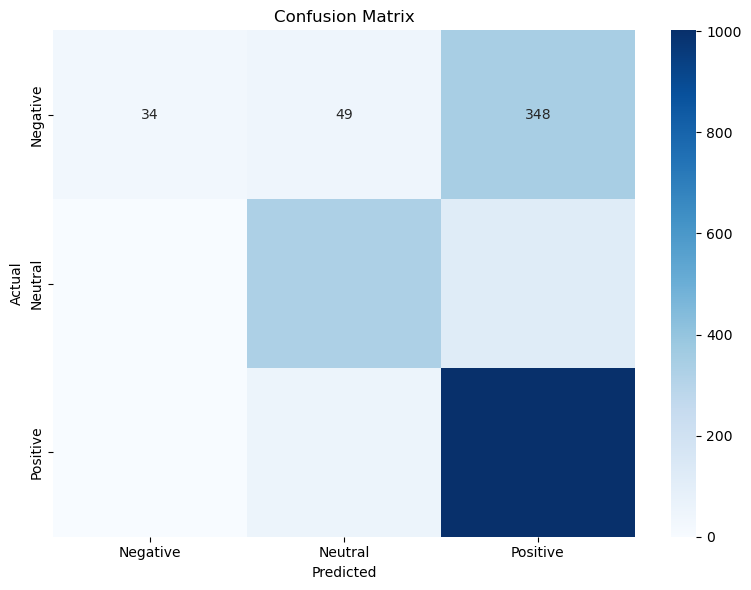

In [9]:
cm = confusion_matrix(y_true, y_pred, labels=randomForestModel.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=randomForestModel.classes_,
            yticklabels=randomForestModel.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix_randomForest.png")
plt.show()

Bar Chart For Classification Report

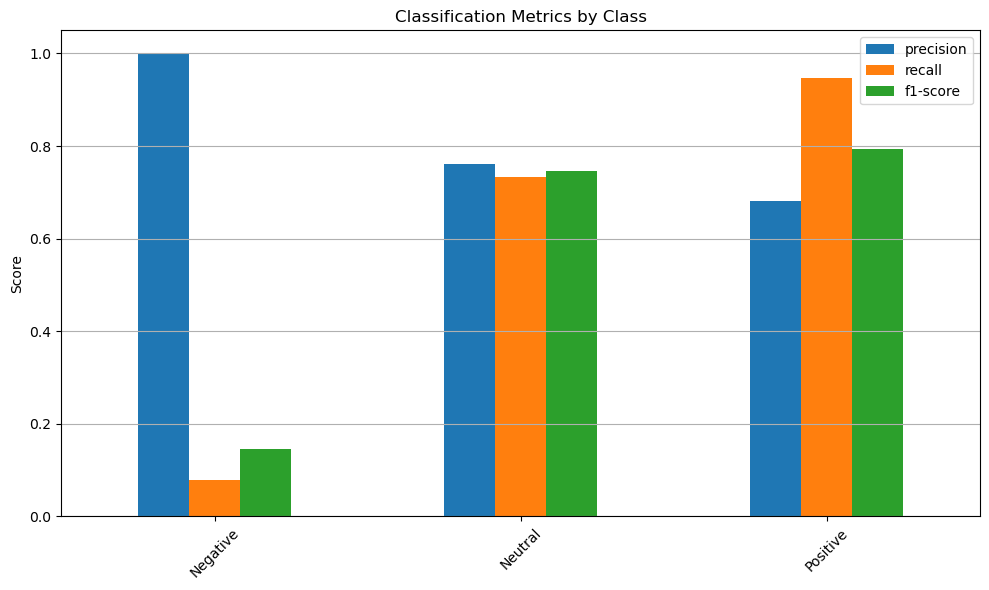

In [10]:
report_dict = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Filter only class rows (skip avg/accuracy rows)
class_rows = report_df.iloc[:-3, :]

# Plot precision, recall, f1-score per class
class_rows[["precision", "recall", "f1-score"]].plot(kind='bar', figsize=(10, 6))
plt.title("Classification Metrics by Class")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("classification_report_randomForest.png")
plt.show()
